In [1]:
# Import NumPy for numerical operations, such as handling arrays and mathematical functions
import numpy as np

# Import Pandas for data manipulation, especially for working with DataFrames (structured data)
import pandas as pd

# Import Matplotlib's pyplot module for data visualization (e.g., creating plots and histograms)
import matplotlib.pyplot as plt

# Import Seaborn, a statistical data visualization library built on top of Matplotlib, for more attractive and informative graphics
import seaborn as sns

# Import random for random number generation
import random

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

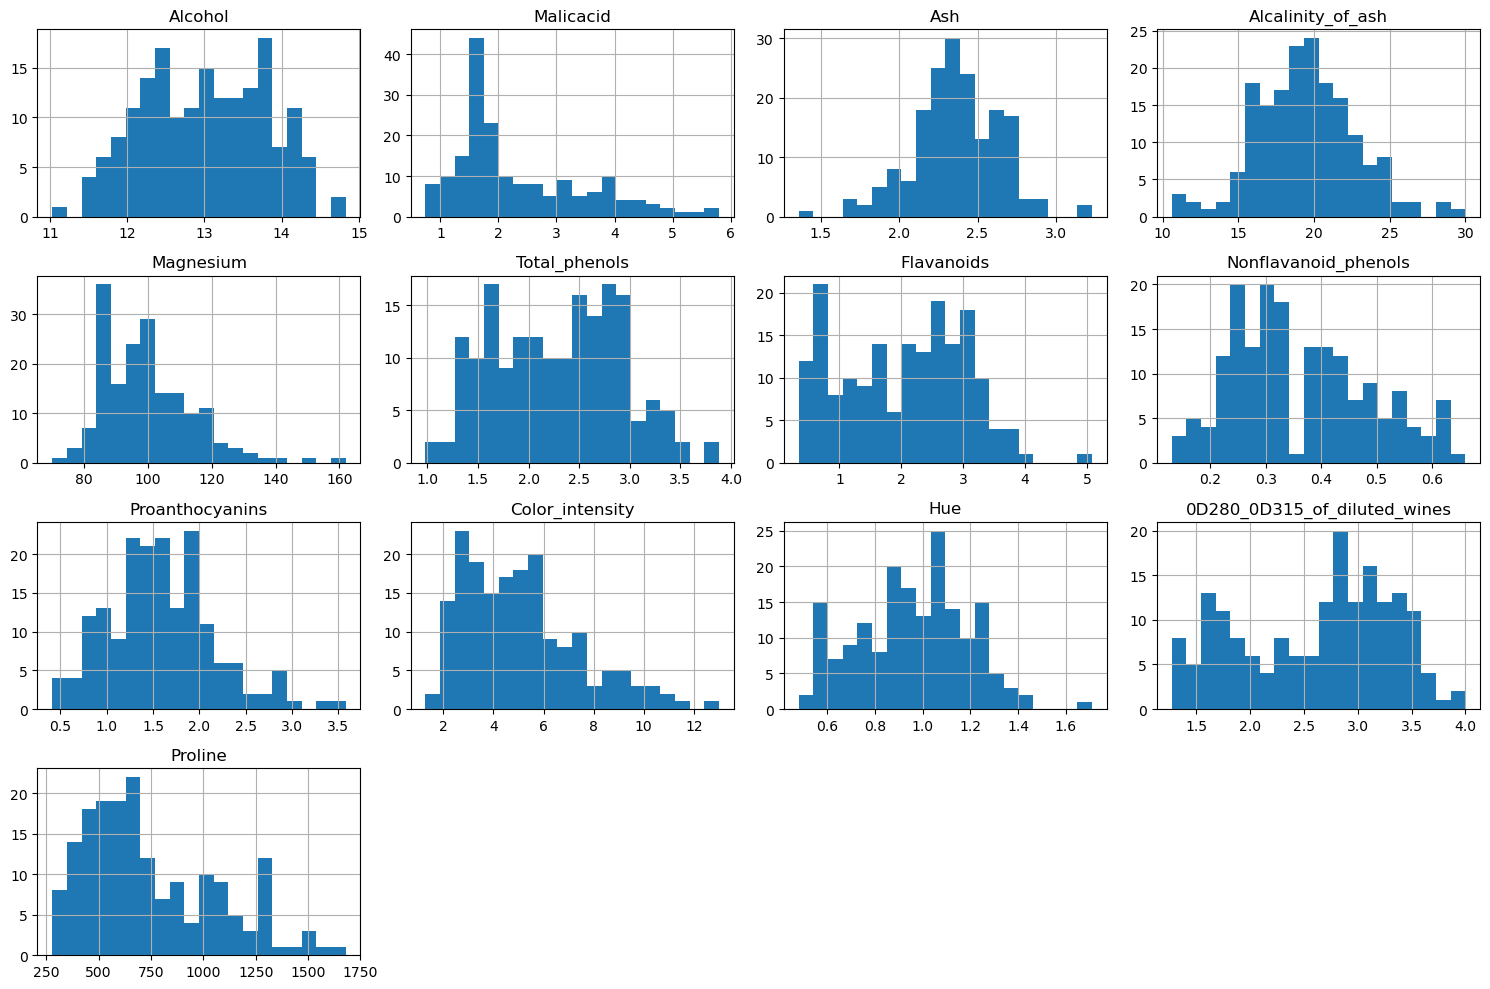

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
# Assigning the dataset X to the variable wine
wine = X

# Plot histograms for each attribute
wine.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Generating summary statistics for the numerical columns in the wine DataFrame
wine.describe()

In [4]:
wine['cluster'] = wine.index
wine.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4


In [20]:
def clusters_list(df):
    """
    Create a dictionary that groups DataFrame rows by their cluster index.

    Parameters:
    df (pandas.DataFrame): DataFrame containing a 'cluster' column, with the cluster index for each row.

    Returns:
    dict: A dictionary where each key is a cluster index, and each value is a list of row indices that belong to that cluster.
    """
    # Initialize a dictionary to store clusters with empty lists
    clusters = {}

    # Loop through all rows of the DataFrame
    for j in range(len(df)):
        # Get the cluster index for the current row
        cluster_index = df.iloc[j]['cluster']

        # Initialize the list for the cluster if it doesn't exist
        if cluster_index not in clusters:
            clusters[cluster_index] = []

        # Append the row index to the corresponding cluster
        clusters[cluster_index].append(j)

    return clusters

def merge_clusters(df, index_1, index_2, clusters_dict):
    """
    Merge two clusters in the DataFrame and update the clusters dictionary.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the dataset with 'cluster' column.
    index_1 (int): The cluster index of the first cluster to be merged.
    index_2 (int): The cluster index of the second cluster to be merged.
    clusters_dict (dict): Dictionary containing the clusters as lists of row indices.

    Returns:
    None: This function modifies the DataFrame and the clusters dictionary in place.
    """
    # Ensure index_1 is the smaller index
    if index_1 > index_2:
        index_1, index_2 = index_2, index_1

    # Move all rows from cluster_2 to cluster_1
    for cluster_index in clusters_dict[index_2]:
        # Update the cluster in the DataFrame
        df.at[cluster_index, 'cluster'] = index_1
        
        # Append the index to cluster_1 in the dictionary
        clusters_dict[index_1].append(cluster_index)

    # Remove the old cluster from the dictionary
    del clusters_dict[index_2]

def complete_linkage(df, cluster_1, cluster_2):
    """
    Compute the complete linkage distance (max distance) between two clusters.

    Parameters:
    df (pandas.DataFrame): DataFrame containing data points.
    cluster_1 (list): List of row indices belonging to the first cluster.
    cluster_2 (list): List of row indices belonging to the second cluster.

    Returns:
    float: The maximum squared Euclidean distance between any two points from the two clusters.
    """
    # Initialize the distance to the smallest possible value
    max_distance = -np.inf

    # Loop through all pairs of points between the two clusters
    for index_1 in cluster_1:
        for index_2 in cluster_2:
            # Get the records as numpy arrays
            record_1 = np.array(df.iloc[index_1])
            record_2 = np.array(df.iloc[index_2])

            # Calculate the squared Euclidean distance between the two records
            distance_of_current_pair = np.linalg.norm(record_1 - record_2) ** 2

            # If the current distance is greater than the max distance, update it
            if distance_of_current_pair > max_distance:
                max_distance = distance_of_current_pair

    return max_distance



def hierarchical_clustering(df):
    """
    Perform hierarchical (agglomerative) clustering using the bottom-up approach.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the dataset with data points and a 'cluster' column.

    Returns:
    list: A list of tuples showing the clusters that were merged at each step.
    """
    # Initialize clusters
    clusters_dict = clusters_list(df)
    merged_clusters = []

    # Keep merging until only one cluster remains
    while len(clusters_dict) > 1:
        min_distance = np.inf
        clusters_to_merge = (None, None)

        # Find the pair of clusters with the smallest complete linkage distance
        cluster_indices = list(clusters_dict.keys())
        for i in range(len(cluster_indices)):
            for j in range(i + 1, len(cluster_indices)):
                index_1 = cluster_indices[i]
                index_2 = cluster_indices[j]
                
                # Calculate the complete linkage distance between cluster_1 and cluster_2
                distance = complete_linkage(df, clusters_dict[index_1], clusters_dict[index_2])

                # If this pair is the closest, update the minimum distance and clusters to merge
                if distance < min_distance:
                    min_distance = distance
                    clusters_to_merge = (index_1, index_2)

        # Merge the two closest clusters
        index_1, index_2 = clusters_to_merge
        merge_clusters(df, index_1, index_2, clusters_dict)
        
        # Record which clusters were merged
        merged_clusters.append((index_1, index_2))

        print(f"Merged clusters {index_1} and {index_2} with distance {min_distance:.4f}")

    return merged_clusters

# Example usage:
# Assuming df is your pandas DataFrame containing data and an initialized 'cluster' column
df = pd.DataFrame({
    'x': [1, 2, 3, 8, 9, 10],
    'y': [1, 1, 1, 2, 2, 2],
    'cluster': [i for i in range(6)]  # Initialize each point as its own cluster
})

# Perform hierarchical clustering
merged_clusters = hierarchical_clustering(df)

# Print the order in which clusters were merged
print("Order of merges:", merged_clusters)

Merged clusters 0 and 1 with distance 2.0000
Merged clusters 3 and 4 with distance 2.0000
Merged clusters 0 and 2 with distance 8.0000
Merged clusters 3 and 5 with distance 8.0000
Merged clusters 0 and 3 with distance 91.0000
Order of merges: [(0, 1), (3, 4), (0, 2), (3, 5), (0, 3)]


In [21]:
hierarchical_clustering(wine)

Merged clusters 8.0 and 9.0 with distance 11.6934
Merged clusters 124.0 and 125.0 with distance 21.5254
Merged clusters 123.0 and 124.0 with distance 22.2822
Merged clusters 175.0 and 176.0 with distance 29.7177
Merged clusters 160.0 and 165.0 with distance 31.8158
Merged clusters 161.0 and 163.0 with distance 33.5412
Merged clusters 105.0 and 108.0 with distance 33.8258
Merged clusters 46.0 and 48.0 with distance 42.9158
Merged clusters 60.0 and 65.0 with distance 50.0985
Merged clusters 168.0 and 174.0 with distance 51.0933
Merged clusters 137.0 and 142.0 with distance 60.6598
Merged clusters 159.0 and 164.0 with distance 60.7181
Merged clusters 22.0 and 29.0 with distance 75.8823
Merged clusters 66.0 and 67.0 with distance 90.9430
Merged clusters 27.0 and 30.0 with distance 94.4368
Merged clusters 36.0 and 44.0 with distance 102.1449
Merged clusters 99.0 and 103.0 with distance 110.0059
Merged clusters 1.0 and 8.0 with distance 110.3546
Merged clusters 126.0 and 128.0 with distance 

Merged clusters 43.0 and 96.0 with distance 8503.5458
Merged clusters 19.0 and 28.0 with distance 8780.6826
Merged clusters 3.0 and 10.0 with distance 9569.9429
Merged clusters 6.0 and 33.0 with distance 9815.8128
Merged clusters 32.0 and 95.0 with distance 10150.3348
Merged clusters 2.0 and 13.0 with distance 10419.3698
Merged clusters 61.0 and 146.0 with distance 10557.3841
Merged clusters 68.0 and 141.0 with distance 13043.3817
Merged clusters 59.0 and 61.0 with distance 13811.4400
Merged clusters 4.0 and 68.0 with distance 14647.3174
Merged clusters 43.0 and 87.0 with distance 19728.6858
Merged clusters 63.0 and 80.0 with distance 20460.1749
Merged clusters 6.0 and 53.0 with distance 22104.8527
Merged clusters 19.0 and 144.0 with distance 23744.8127
Merged clusters 0.0 and 32.0 with distance 24095.3775
Merged clusters 43.0 and 153.0 with distance 33536.6356
Merged clusters 4.0 and 19.0 with distance 50906.4413
Merged clusters 3.0 and 18.0 with distance 53146.8607
Merged clusters 59

[(8.0, 9.0),
 (124.0, 125.0),
 (123.0, 124.0),
 (175.0, 176.0),
 (160.0, 165.0),
 (161.0, 163.0),
 (105.0, 108.0),
 (46.0, 48.0),
 (60.0, 65.0),
 (168.0, 174.0),
 (137.0, 142.0),
 (159.0, 164.0),
 (22.0, 29.0),
 (66.0, 67.0),
 (27.0, 30.0),
 (36.0, 44.0),
 (99.0, 103.0),
 (1.0, 8.0),
 (126.0, 128.0),
 (28.0, 35.0),
 (51.0, 57.0),
 (6.0, 11.0),
 (114.0, 123.0),
 (139.0, 140.0),
 (82.0, 89.0),
 (107.0, 116.0),
 (86.0, 92.0),
 (83.0, 84.0),
 (37.0, 42.0),
 (129.0, 138.0),
 (133.0, 139.0),
 (104.0, 109.0),
 (153.0, 161.0),
 (63.0, 71.0),
 (85.0, 91.0),
 (105.0, 111.0),
 (49.0, 51.0),
 (102.0, 113.0),
 (114.0, 118.0),
 (168.0, 173.0),
 (87.0, 101.0),
 (34.0, 37.0),
 (148.0, 154.0),
 (23.0, 38.0),
 (32.0, 47.0),
 (147.0, 159.0),
 (160.0, 170.0),
 (132.0, 143.0),
 (70.0, 74.0),
 (158.0, 172.0),
 (7.0, 16.0),
 (97.0, 102.0),
 (80.0, 93.0),
 (99.0, 115.0),
 (43.0, 60.0),
 (72.0, 79.0),
 (156.0, 171.0),
 (86.0, 90.0),
 (46.0, 54.0),
 (131.0, 137.0),
 (88.0, 104.0),
 (119.0, 132.0),
 (136.0, 155.